In [47]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
df=pd.read_csv("messages.csv")
df 

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [48]:
#checking null
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [49]:
df.dtypes

subject    object
message    object
label       int64
dtype: object

In [50]:
df.shape

(2893, 3)

In [51]:
df.dropna(inplace=True)

In [52]:
#checking null
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [53]:
df.drop_duplicates(inplace=True)
print(df.shape)

(2814, 3)


In [54]:
df.describe()

label
count  2814.000000
mean      0.161692
std       0.368233
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

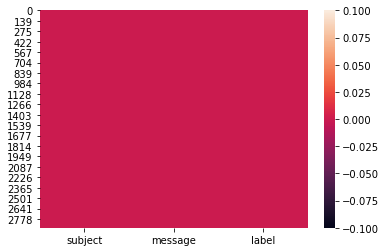

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

In [8]:
# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['message'].head().apply(process)

0    [content, length, 3386, appleiss, research, ce...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
5    [content, length, 4437, call, papers, best, go...
Name: message, dtype: object

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
#print(vectorizer.get_feature_names()) 
print(X.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
#from sklearn.feature_extraction.text import CountVectorizer
#message = CountVectorizer(analyzer=process).fit_transform(df['message'])

In [58]:
#message

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, df['label'], test_size=0.20, random_state=0)

In [60]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [61]:
print(classifier.predict(xtrain))
print(ytrain.values)

[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]


In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1894
           1       0.96      1.00      0.98       357

    accuracy                           0.99      2251
   macro avg       0.98      0.99      0.99      2251
weighted avg       0.99      0.99      0.99      2251


Confusion Matrix: 
 [[1879   15]
 [   1  356]]
Accuracy: 
 0.9928920479786761


In [63]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 

In [64]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       465
           1       0.97      0.98      0.97        98

    accuracy                           0.99       563
   macro avg       0.98      0.99      0.98       563
weighted avg       0.99      0.99      0.99       563


Confusion Matrix: 
 [[462   3]
 [  2  96]]
Accuracy: 
 0.9911190053285968
